In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(4900, 1, 128, 128)
(4900,)


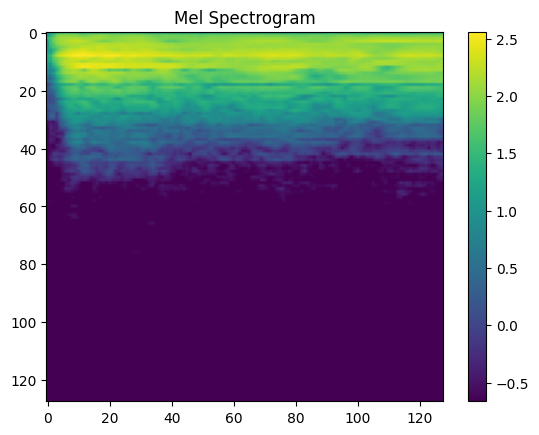

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json

x = np.load('/content/drive/MyDrive/Dataset/Processed/X.npy')
y = np.load('/content/drive/MyDrive/Dataset/Processed/Y.npy')

with open('/content/drive/MyDrive/Dataset/Processed/label_map.json', 'r') as f:
    label_map = json.load(f)

print(x.shape)
print(y.shape)
plt.imshow(x[0].squeeze(), aspect='auto')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()


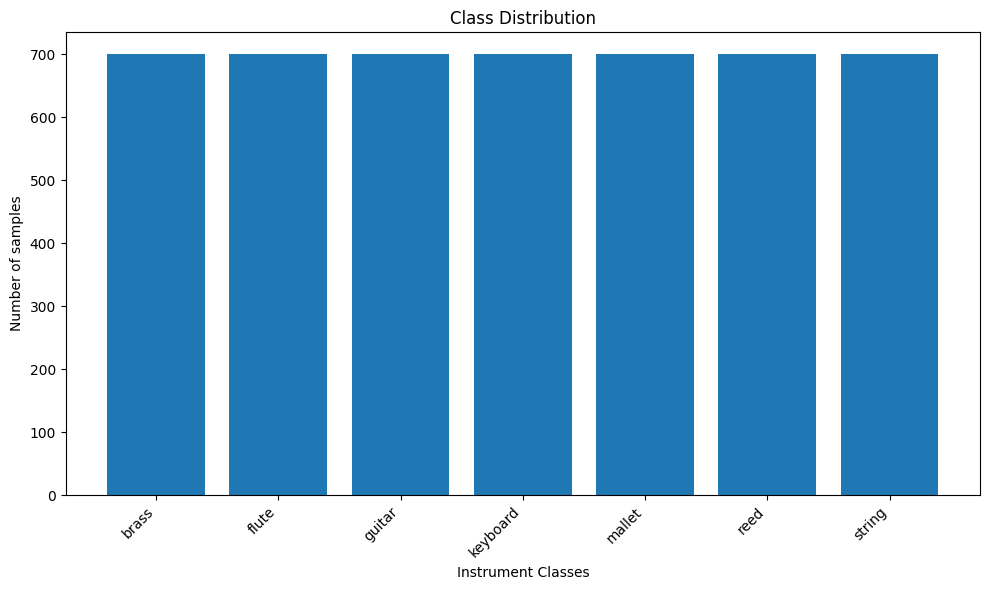

In [ ]:
unique, counts = np.unique(y, return_counts=True)

# Create inverse mapping (index -> name)
index_to_name = {v: k for k, v in label_map.items()}

# Get class names for the plot
class_names = [index_to_name[idx] for idx in unique]

plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel("Instrument Classes")
plt.ylabel("Number of samples")
plt.title("Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


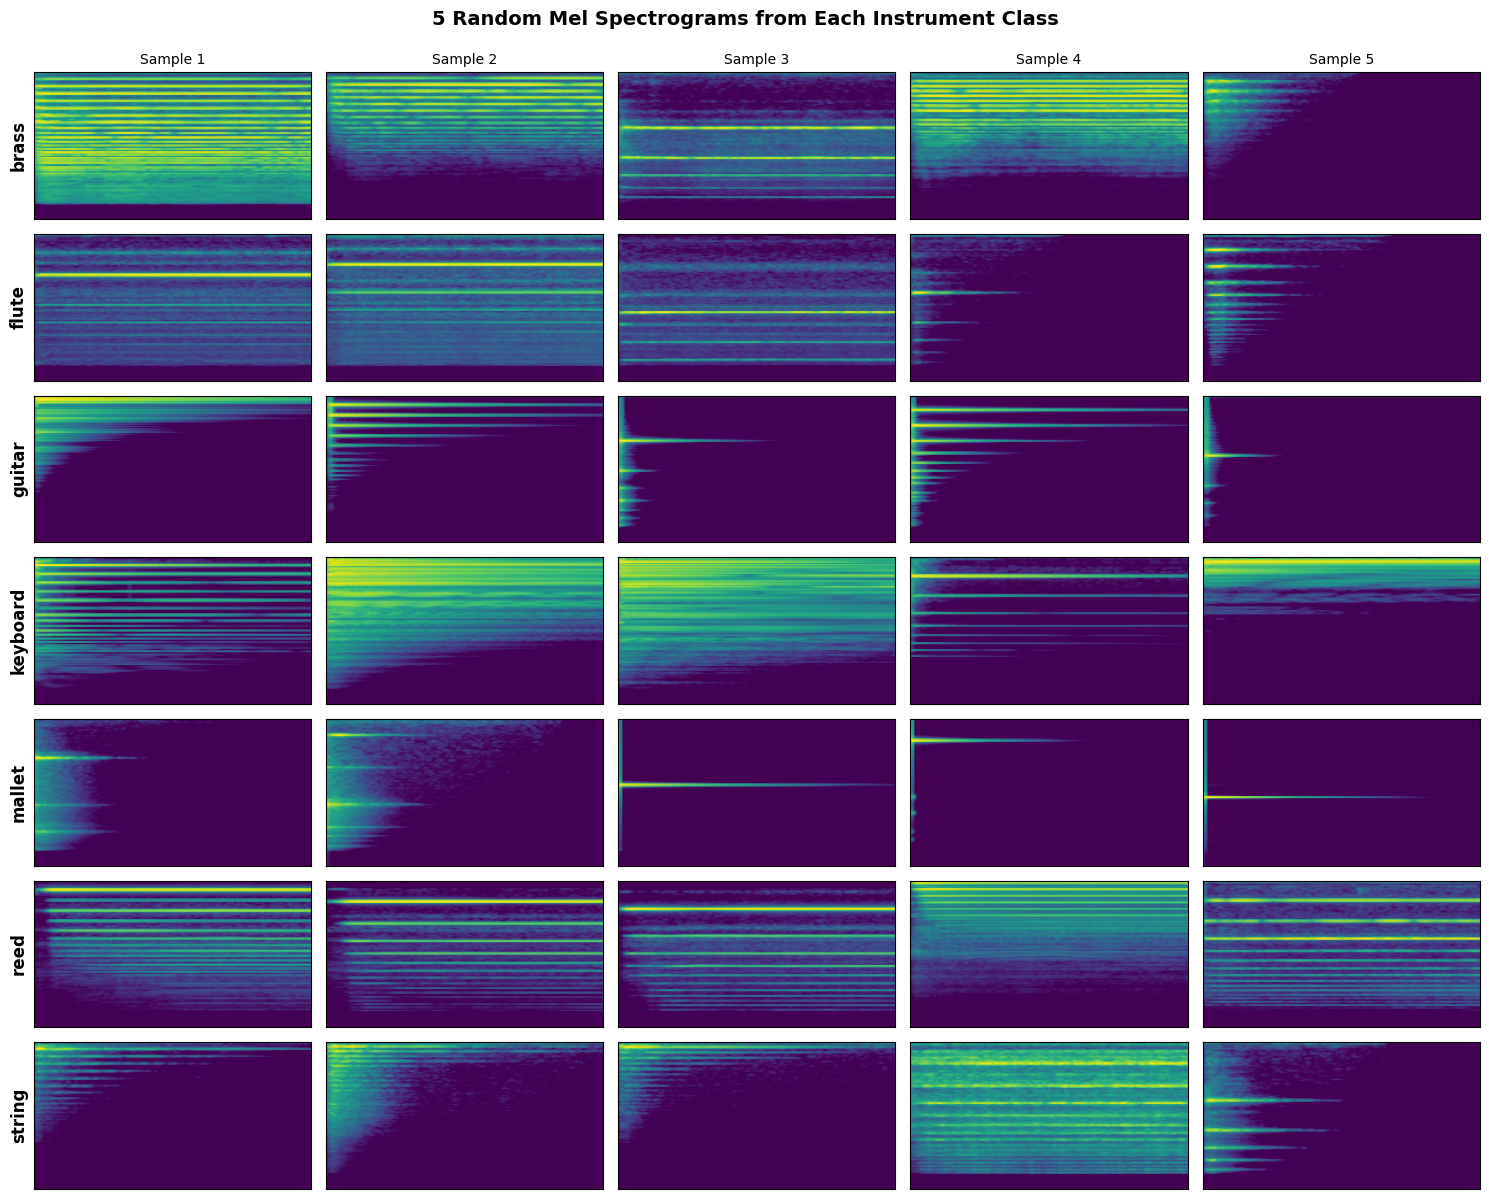

In [ ]:
import random
unique_classes = np.unique(y)
n_classes = len(unique_classes)
n_samples_per_class = 5

# Create figure with subplots
fig, axes = plt.subplots(n_classes, n_samples_per_class, figsize=(15, 12))

for i, class_idx in enumerate(unique_classes):
    # Get all indices for this class
    class_indices = np.where(y == class_idx)[0]

    # Randomly select 5 samples
    random_indices = random.sample(list(class_indices), n_samples_per_class)

    for j, sample_idx in enumerate(random_indices):
        # Plot spectrogram
        ax = axes[i, j]
        im = ax.imshow(x[sample_idx].squeeze(), aspect='auto', cmap='viridis')

        # Add title only to first column
        if j == 0:
            ax.set_ylabel(index_to_name[class_idx], fontsize=12, fontweight='bold')

        # Add column number on top row
        if i == 0:
            ax.set_title(f'Sample {j+1}', fontsize=10)

        # Remove ticks for cleaner look
        ax.set_xticks([])
        ax.set_yticks([])

plt.suptitle('5 Random Mel Spectrograms from Each Instrument Class',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()
